In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../database/publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import mixing
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm
from pyfluids import Fluid, FluidsList, Input


ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('brine')
model_names

['sk17_brine',
 'Li_18_1%plg_brine',
 'Li_18_25%plg_brine',
 'Li_18_10%plg_brine',
 'Li_18_3%alb_brine',
 'Li_18_10%alb_brine',
 'gk19_brine']

# Exploring Pyrrhenious's Brine Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

  * Sinmyo R. and Keppler H. (2017). Electrical conductivity of NaCl‐bearing aqueous fluids to 600 °C and 1 GPa

  * Li et al. 2018. Electrical conductivity of the plagioclase–NaCl–water system and its implication for the high conductivity anomalies in the mid-lower crust of Tibet Plateau
  
  * Haihao Guo and Hans Keppler (2019). Electrical Conductivity of NaCl‐Bearing Aqueous Fluids to 900 °C and 5 GPa
 
# Sinmyo R. and Keppler H. (2017)

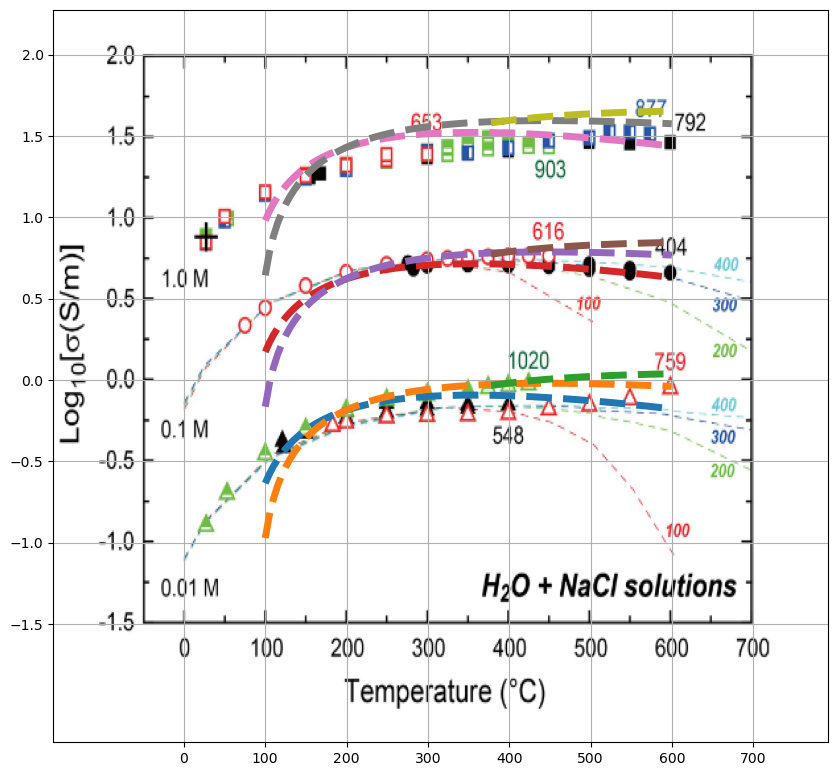

In [2]:
model = 'sk17_brine'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'].values[0],ec_model_row['temp_max'].values[0],num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for nacl in [0.01,0.1,1]:
        for p in [0.5,1,3]:
            conductivity = ecdatabase.get_model(model).get_conductivity(T=temperature_range,P=p,nacl=nacl*5)
            ax.plot(temperature_range-273.15,np.log10(conductivity),linestyle='--',linewidth=5,label=model)
    


In [10]:
ecdatabase.get_model(model).get_conductivity(T=800,P=1,nacl=5)

array([6.11933114e-08])

In [16]:
np.log10(ecdatabase.get_model(model).get_conductivity(T=np.asarray([500.0]),P=1,nacl=5))

array([1.48243302])

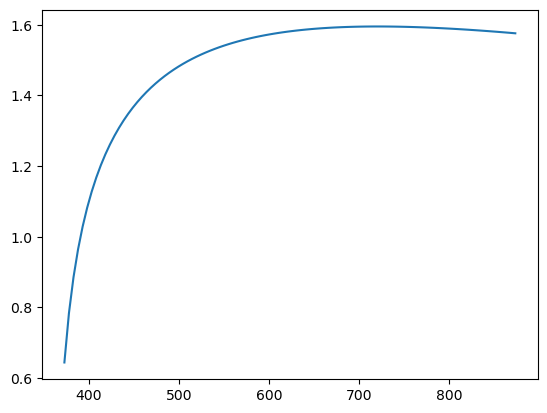

In [11]:
plt.plot(temperature_range,np.log10(ecdatabase.get_model(model).get_conductivity(T=temperature_range,P=1,nacl=5)))

## Li et al. 2018

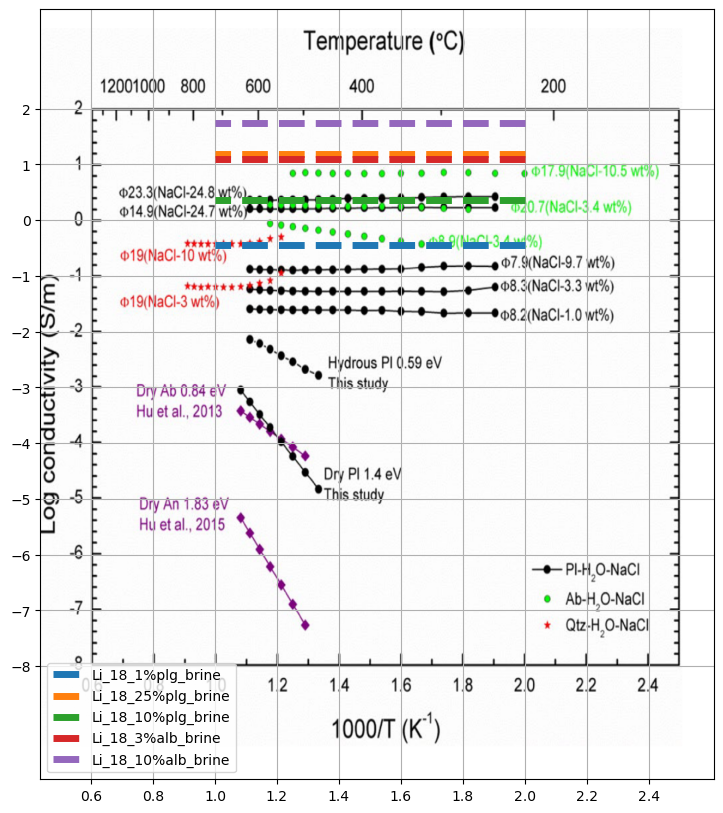

In [4]:
model = 'Li_18_1%plg_brine'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(500,1000,num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in ecdatabase.get_model_list_for_phase('brine'):
        conductivity = ecdatabase.get_model(model_name).get_conductivity(T=temperature_range)
        ax.plot(1e3/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5,label=model_name)
    plt.legend()
    break
    


# Haihao Guo and Hans Keppler (2019)

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/publication correspondence/../pyrrhenious/mechanisms.py:1313: RuntimeWarning: invalid value encountered in log10
  return 10**(a + temp_term + salt_term + density_term + np.log10(A0))


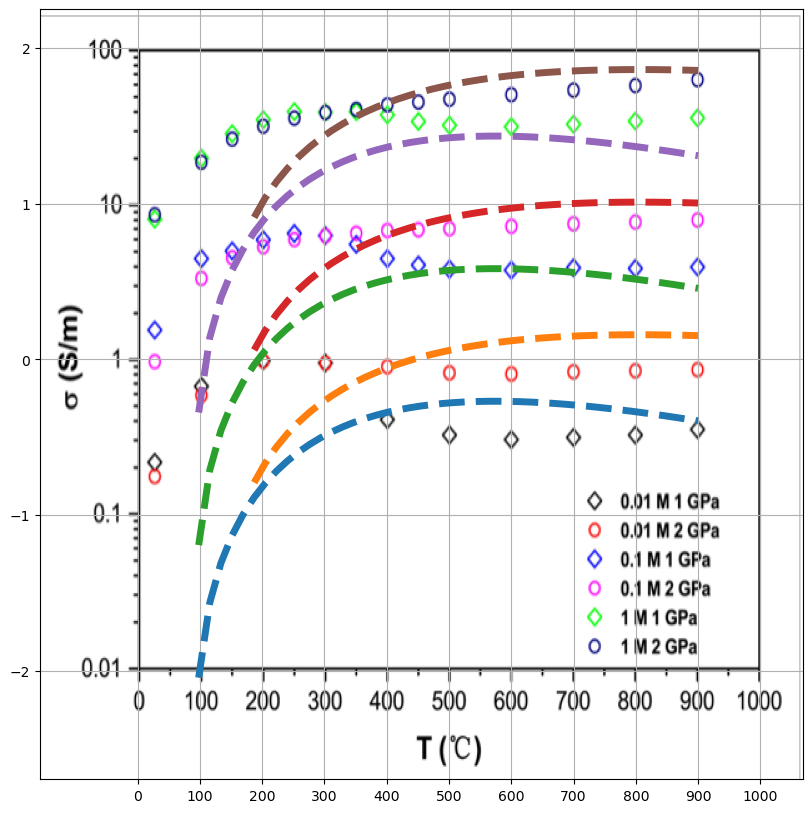

In [6]:
model = 'gk19_brine'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(300,1173)

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for nacl in [0.01,0.1,1]:
        for p in [1,2]:
            conductivity = ecdatabase.get_model(model).get_conductivity(T=temperature_range,P=p,nacl=nacl*5)
            ax.plot(temperature_range-273.15,np.log10(conductivity),linestyle='--',linewidth=5,label=model)

In [9]:
temperature_range = np.linspace(573,1173)
pressure_range = np.linspace(1,5)

tt, pp = np.meshgrid(temperature_range,pressure_range)
conductivity = ecdatabase.get_model(model).get_conductivity(T=tt,P=pp,nacl=5)


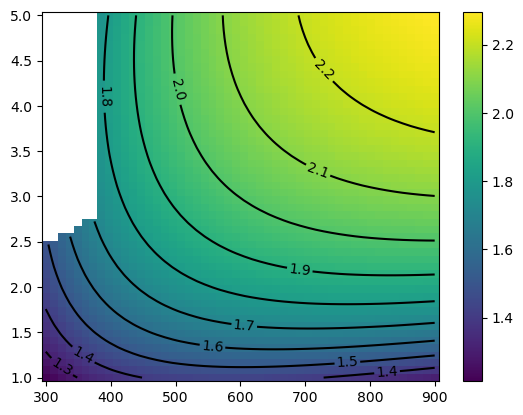

In [10]:
fig, ax = plt.subplots()
cs = ax.pcolormesh(temperature_range-273.15,pressure_range,np.log10(conductivity))
ct = ax.contour(temperature_range-273.15,pressure_range,np.log10(conductivity),
                colors='black',levels=np.arange(1.3,2.3,0.1))
ax.clabel(ct, np.arange(1.3,2.3,0.1),inline=True)
res=plt.colorbar(cs,ax=ax)

Li_18_1%plg_brine
[2.40040018e-04 2.57390145e-04 2.75994584e-04 2.95944047e-04
 3.17335818e-04 3.40274219e-04 3.64871128e-04 3.91246521e-04
 4.19529065e-04 4.49856746e-04 4.82377546e-04 5.17250167e-04
 5.54644815e-04 5.94744032e-04 6.37743594e-04 6.83853472e-04
 7.33298871e-04 7.86321331e-04 8.43179926e-04 9.04152534e-04
 9.69537215e-04 1.03965368e-03 1.11484488e-03 1.19547868e-03
 1.28194974e-03 1.37468140e-03 1.47412784e-03 1.58077633e-03
 1.69514963e-03 1.81780866e-03 1.94935526e-03 2.09043522e-03
 2.24174153e-03 2.40401788e-03 2.57806242e-03 2.76473176e-03
 2.96494537e-03 3.17969026e-03 3.41002598e-03 3.65709010e-03
 3.92210405e-03 4.20637944e-03 4.51132484e-03 4.83845319e-03
 5.18938966e-03 5.56588025e-03 5.96980106e-03 6.40316827e-03
 6.86814896e-03 7.36707288e-03 7.90244508e-03 8.47695973e-03
 9.09351502e-03 9.75522942e-03 1.04654593e-02 1.12278180e-02
 1.20461972e-02 1.29247889e-02 1.38681112e-02 1.48810351e-02
 1.59688143e-02 1.71371182e-02 1.83920678e-02 1.97402754e-02
 2.118

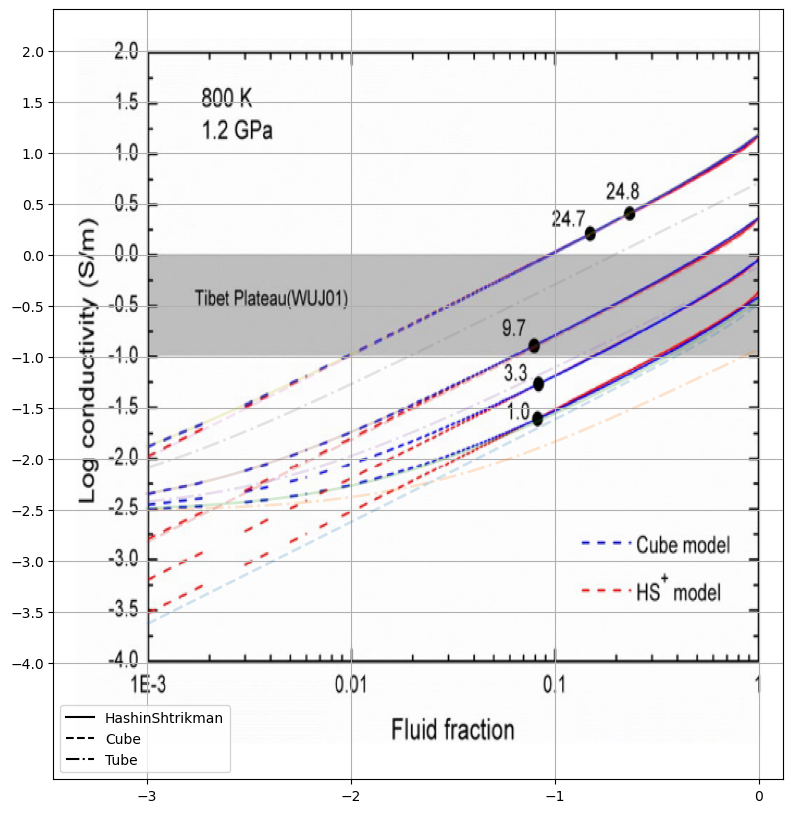

In [8]:

model = 'Li_18_1%plg_brine'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
fluid_frac = np.logspace(-3,0,num=100)
temp = 800
matrix_name = 'Li_18_wet_plag'
fluid_models = ['Li_18_1%plg_brine','Li_18_10%plg_brine', 'Li_18_25%plg_brine']
mixing_models = [mixing.CubeModel, mixing.TubesModel, mixing.HashinShtrikmanUpper]

def get_line_properties(fluid_name,mixing_class):
    if 'HS' in mixing_class.mixing_model:
        linestyle='-'
    elif mixing_class.mixing_model=='Cube':
        linestyle='--'
    elif mixing_class.mixing_model=='Tube':
        linestyle='-.'
    
    return dict(linestyle=linestyle,linewidth=2)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for fluid_name in fluid_models:
        print(fluid_name)
        for mixing_class in mixing_models:
            matrix_model = ecdatabase.get_model(matrix_name)
            fluid_model  = ecdatabase.get_model(fluid_name)
            mixing_model = mixing_class(matrix_model,fluid_model)
            c = mixing_model.get_conductivity(fluid_frac,T=temp,use_partzsch = False)
            print(c)
            properties = get_line_properties(fluid_name,mixing_class)
            ax.plot(np.log10(fluid_frac), np.log10(c),alpha=0.2,**properties)

plt.plot([],[],linestyle='-', label='HashinShtrikman',color='black')
plt.plot([],[],linestyle='--', label='Cube',color='black')
plt.plot([],[],linestyle='-.', label='Tube',color='black')
plt.legend(loc='lower left')

In [8]:
# 

array([-6.45794966, -6.45819854, -6.45846544, -6.45875166, -6.4590586 ,
       -6.45938775, -6.45974075, -6.4601193 , -6.46052527, -6.46096065,
       -6.46142757, -6.46192833, -6.46246539, -6.46304138, -6.46365913,
       -6.46432169, -6.46503232, -6.46579451, -6.46661204, -6.46748892,
       -6.46842951, -6.46943844, -6.47052071, -6.4716817 , -6.47292716,
       -6.47426327, -6.47569671, -6.4772346 , -6.47888463, -6.48065505,
       -6.48255474, -6.48459325, -6.48678082, -6.4891285 , -6.49164817,
       -6.4943526 , -6.49725556, -6.50037185, -6.50371743, -6.5073095 ,
       -6.51116657, -6.51530863, -6.51975721, -6.52453557, -6.52966881,
       -6.53518402, -6.5411105 , -6.54747991, -6.55432651, -6.56168737,
       -6.56960267, -6.57811594, -6.58727439, -6.59712931, -6.60773638,
       -6.6191562 , -6.63145471, -6.64470375, -6.65898173, -6.67437426,
       -6.69097495, -6.70888631, -6.72822072, -6.74910158, -6.77166459,
       -6.79605925, -6.82245048, -6.85102059, -6.88197148, -6.91

In [9]:
fluid_frac

array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.00811131, 0.00869749, 0.00932603, 0.01      , 0.01072267,
       0.01149757, 0.01232847, 0.01321941, 0.01417474, 0.01519911,
       0.01629751, 0.01747528, 0.01873817, 0.02009233, 0.02154435,
       0.0231013 , 0.02477076, 0.02656088, 0.02848036, 0.03053856,
       0.03274549, 0.03511192, 0.03764936, 0.04037017, 0.04328761,
       0.04641589, 0.04977024, 0.05336699, 0.05722368, 0.06135907,
       0.06579332, 0.07054802, 0.07564633, 0.08111308, 0.0869749 ,
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475

In [2]:
ecdatabase.get_phases()


['basaltic melt',
 'brine',
 'clinopyroxene',
 'garnet',
 'granite',
 'granulite',
 'olivine',
 'omphacite',
 'orthopyroxene',
 'peridotite',
 'pervoskite',
 'phlogopite',
 'plagioclaise',
 'wadsleyite',
 'gabbro',
 'basalt',
 'schist']